# **Retail Analysis with Walmart Data**

### **Problem Statement**

**Walmart** is one of the leading American retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores.

There are **Sales Data** available for 45 stores of Walmart.  
Walmart would like to **predict the sales and demand accurately**, using the given data.   

There are certain events and holidays which impact sales on each day. 
The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

In [ ]:
## importing neccessary libraries
import pandas as  pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from datetime import datetime

### **Dataset Description**

This is the historical data that covers sales from `2010-02-05` to `2012-11-01`, in the file WalmartStoresales.  
 Within this file you will find the following fields:

* `Store` - the store number
* `Date` - the week of sales
* `Weekly_Sales` - sales for the given store
* `Holiday_Flag` - whether the week is a special holiday week : 1 – Holiday week, 0 – Non-holiday week
* `Temperature` - Temperature on the day of sale
* `Fuel_Price` - Cost of fuel in the region
* `CPI` – Prevailing consumer price index
* `Unemployment` - Prevailing unemployment rate
  
    
Holiday Events

* `Super Bowl`: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13  
* `Labour Day`: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13  
* `Thanksgiving`: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13  
* `Christmas`: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13  

### **Data Overview**

In [ ]:
## loading dataset
data = pd.read_csv('/content/drive/MyDrive/Assignments/Walmart_Store_sales.csv')
data

Store        Date  Weekly_Sales  ...  Fuel_Price         CPI  Unemployment
0         1  05-02-2010    1643690.90  ...       2.572  211.096358         8.106
1         1  12-02-2010    1641957.44  ...       2.548  211.242170         8.106
2         1  19-02-2010    1611968.17  ...       2.514  211.289143         8.106
3         1  26-02-2010    1409727.59  ...       2.561  211.319643         8.106
4         1  05-03-2010    1554806.68  ...       2.625  211.350143         8.106
...     ...         ...           ...  ...         ...         ...           ...
6430     45  28-09-2012     713173.95  ...       3.997  192.013558         8.684
6431     45  05-10-2012     733455.07  ...       3.985  192.170412         8.667
6432     45  12-10-2012     734464.36  ...       4.000  192.327265         8.667
6433     45  19-10-2012     718125.53  ...       3.969  192.330854         8.667
6434     45  26-10-2012     760281.43  ...       3.882  192.308899         8.667

[6435 rows x 8 columns]

### **Data Understanding**

In [ ]:
## size of the data
print(data.shape)

(6435, 8)


In [ ]:
## unique values
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
## fields
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
## data Types
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
## any missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
## summarizing all information of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
## summarizing all Statistical Information
data.describe()

Store  Weekly_Sales  ...          CPI  Unemployment
count  6435.000000  6.435000e+03  ...  6435.000000   6435.000000
mean     23.000000  1.046965e+06  ...   171.578394      7.999151
std      12.988182  5.643666e+05  ...    39.356712      1.875885
min       1.000000  2.099862e+05  ...   126.064000      3.879000
25%      12.000000  5.533501e+05  ...   131.735000      6.891000
50%      23.000000  9.607460e+05  ...   182.616521      7.874000
75%      34.000000  1.420159e+06  ...   212.743293      8.622000
max      45.000000  3.818686e+06  ...   227.232807     14.313000

[8 rows x 7 columns]

### **Data Preprocessing**

In [ ]:
## convert date to datetime format 
data['Date'] =  pd.to_datetime(data['Date'])
data.Date

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [ ]:
## splitting Date into Day, Month, and Year
data["Day"]= pd.DatetimeIndex(data['Date']).day
data["Week"]= pd.DatetimeIndex(data['Date']).week
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


Store       Date  Weekly_Sales  Holiday_Flag  ...  Day  Week  Month  Year
0         1 2010-05-02    1643690.90             0  ...    2    17      5  2010
1         1 2010-12-02    1641957.44             1  ...    2    48     12  2010
2         1 2010-02-19    1611968.17             0  ...   19     7      2  2010
3         1 2010-02-26    1409727.59             0  ...   26     8      2  2010
4         1 2010-05-03    1554806.68             0  ...    3    18      5  2010
...     ...        ...           ...           ...  ...  ...   ...    ...   ...
6430     45 2012-09-28     713173.95             0  ...   28    39      9  2012
6431     45 2012-05-10     733455.07             0  ...   10    19      5  2012
6432     45 2012-12-10     734464.36             0  ...   10    50     12  2012
6433     45 2012-10-19     718125.53             0  ...   19    42     10  2012
6434     45 2012-10-26     760281.43             0  ...   26    43     10  2012

[6435 rows x 12 columns]

In [ ]:
## Encoding Holidays
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']     #code-1
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']     #code-2
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']     #code-3
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']     #code-4

data['Holiday_Code']=data.Holiday_Flag

for dts in Labour_Day:
  data.loc[data['Date']==dts, 'Holiday_Code']=2
for dts in Thanksgiving:
  data.loc[data['Date']==dts, 'Holiday_Code']=3
for dts in Christmas:
  data.loc[data['Date']==dts, 'Holiday_Code']=4

data

Store       Date  Weekly_Sales  ...  Month  Year  Holiday_Code
0         1 2010-05-02    1643690.90  ...      5  2010             0
1         1 2010-12-02    1641957.44  ...     12  2010             1
2         1 2010-02-19    1611968.17  ...      2  2010             0
3         1 2010-02-26    1409727.59  ...      2  2010             0
4         1 2010-05-03    1554806.68  ...      5  2010             0
...     ...        ...           ...  ...    ...   ...           ...
6430     45 2012-09-28     713173.95  ...      9  2012             0
6431     45 2012-05-10     733455.07  ...      5  2012             0
6432     45 2012-12-10     734464.36  ...     12  2012             0
6433     45 2012-10-19     718125.53  ...     10  2012             0
6434     45 2012-10-26     760281.43  ...     10  2012             0

[6435 rows x 13 columns]

In [ ]:
## Date Range in the dataset
print(data.Date.min())
print(data.Date.max())        #...therfore we have information from 2010 to 2012

2010-01-10 00:00:00
2012-12-10 00:00:00


### **Exploratory Data Analysis**

1. **Total Sales**

In [ ]:
## Sorting out Total Sales fro each Store
storeSales = pd.DataFrame(data.groupby('Store').sum().Weekly_Sales)
storeSales.rename(columns={'Weekly_Sales':'Total_Sales'}, inplace=True)
storeSales.sort_values('Total_Sales')


Total_Sales
Store              
33     3.716022e+07
44     4.329309e+07
5      4.547569e+07
36     5.341221e+07
38     5.515963e+07
3      5.758674e+07
30     6.271689e+07
37     7.420274e+07
16     7.425243e+07
29     7.714155e+07
9      7.778922e+07
42     7.956575e+07
7      8.159828e+07
15     8.913368e+07
43     9.056544e+07
25     1.010612e+08
21     1.081179e+08
45     1.123953e+08
17     1.277821e+08
8      1.299512e+08
35     1.315207e+08
40     1.378703e+08
34     1.382498e+08
26     1.434164e+08
12     1.442872e+08
22     1.470756e+08
18     1.551147e+08
32     1.668192e+08
41     1.813419e+08
28     1.892637e+08
11     1.939628e+08
24     1.940160e+08
23     1.987506e+08
31     1.996139e+08
19     2.066349e+08
39     2.074455e+08
1      2.224028e+08
6      2.237561e+08
27     2.538559e+08
10     2.716177e+08
2      2.753824e+08
13     2.865177e+08
14     2.889999e+08
4      2.995440e+08
20     3.013978e+08

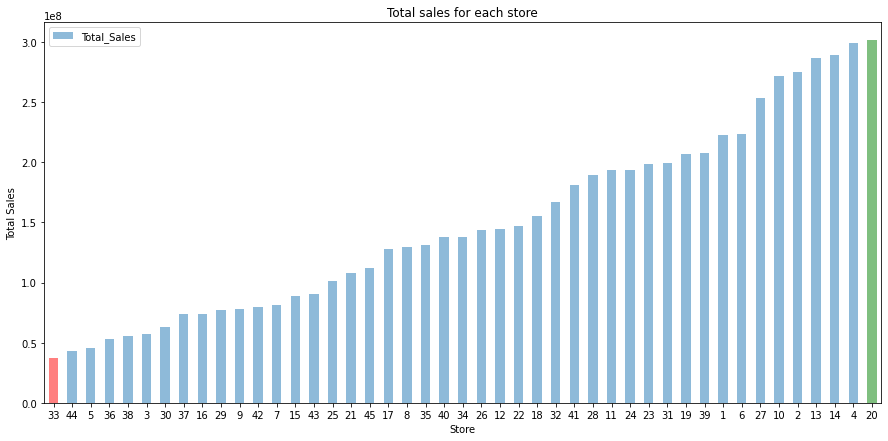

In [ ]:
## visualization

ax = storeSales.sort_values('Total_Sales').plot(kind="bar", figsize=(15,7),alpha=0.5)

ax.patches[0].set_facecolor('red')
ax.patches[-1].set_facecolor('green')

plt.title('Total sales for each store')
plt.xlabel('Store')
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.show()

In [ ]:
## Inference
print("Inference:")
print("Store #",storeSales.Total_Sales.idxmin()," had lowest sale- $",storeSales.Total_Sales.min())
print("Store #",storeSales.Total_Sales.idxmax()," had highest sale- $",storeSales.Total_Sales.max())

Inference:
Store # 33  had lowest sale- $ 37160221.960000016
Store # 20  had highest sale- $ 301397792.46000004


In [ ]:
## Preserving the above store order
storeOrder=storeSales.sort_values('Total_Sales').index.tolist()

In [ ]:
## Creating new feature store_capacity
store_capacity = pd.DataFrame(storeSales.Total_Sales.apply(lambda x: int(x/1e7*10))).reset_index()
store_capacity.rename(columns={'Total_Sales':'store_capacity'}, inplace=True)
data = data.merge(store_capacity)


2. **Mean and Deviation of Sales**

In [ ]:
## Tabulating Average Sales and its standard deviation for each Store
avgSales = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].mean())
avgSales.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)

stdSales = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std())
stdSales.rename(columns={'Weekly_Sales':'Sales_std'}, inplace=True)

storeSalesStats = pd.concat([avgSales, stdSales], axis=1)

storeSalesStats

Average_Sales      Sales_std
Store                              
1       1.555264e+06  155980.767761
2       1.925751e+06  237683.694682
3       4.027044e+05   46319.631557
4       2.094713e+06  266201.442297
5       3.180118e+05   37737.965745
6       1.564728e+06  212525.855862
7       5.706173e+05  112585.469220
8       9.087495e+05  106280.829881
9       5.439806e+05   69028.666585
10      1.899425e+06  302262.062504
11      1.356383e+06  165833.887863
12      1.009002e+06  139166.871880
13      2.003620e+06  265506.995776
14      2.020978e+06  317569.949476
15      6.233125e+05  120538.652043
16      5.192477e+05   85769.680133
17      8.935814e+05  112162.936087
18      1.084718e+06  176641.510839
19      1.444999e+06  191722.638730
20      2.107677e+06  275900.562742
21      7.560691e+05  128752.812853
22      1.028501e+06  161251.350631
23      1.389864e+06  249788.038068
24      1.356755e+06  167745.677567
25      7.067215e+05  112976.788600
26      1.002912e+06  110431.288141
27      1.775216e+06  239930.135688
28      1.323522e+06  181758.967539
29      5.394514e+05   99120.136596
30      4.385796e+05   22809.665590
31      1.395901e+06  125855.942933
32      1.166568e+06  138017.252087
33      2.598617e+05   24132.927322
34      9.667816e+05  104630.164676
35      9.197250e+05  211243.457791
36      3.735120e+05   60725.173579
37      5.189003e+05   21837.461190
38      3.857317e+05   42768.169450
39      1.450668e+06  217466.454833
40      9.641280e+05  119002.112858
41      1.268125e+06  187907.162766
42      5.564039e+05   50262.925530
43      6.333247e+05   40598.413260
44      3.027489e+05   24762.832015
45      7.859814e+05  130168.526635

In [ ]:
## Inference
maxAvgStore = storeSalesStats.Average_Sales.idxmax()
maxStdStore = storeSalesStats.Sales_std.idxmax()

print('Store #',maxAvgStore, 'has highest average sale of $', storeSalesStats.loc[maxAvgStore, 'Average_Sales'])
print('Store #',maxStdStore, 'has highest standard deviation in sale of $', storeSalesStats.loc[maxStdStore, 'Sales_std'])

Store # 20 has highest average sale of $ 2107676.8703496507
Store # 14 has highest standard deviation in sale of $ 317569.9494755081


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


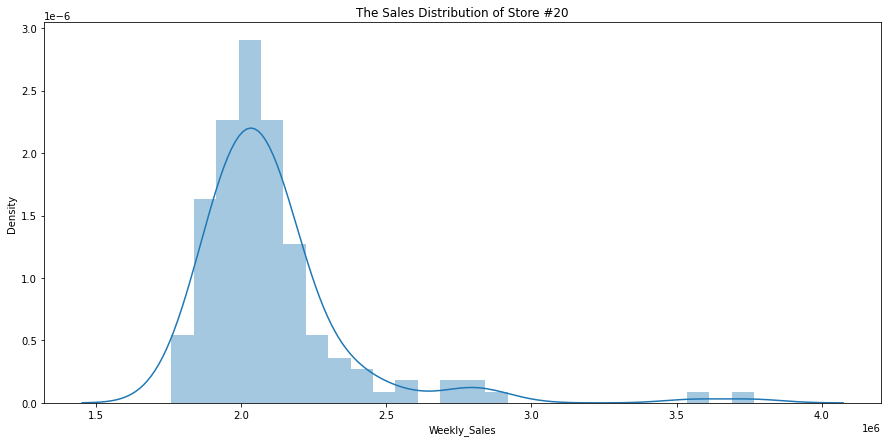

In [ ]:
## visualizing sales distribution for the store having max average sales
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == maxAvgStore]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(maxAvgStore))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


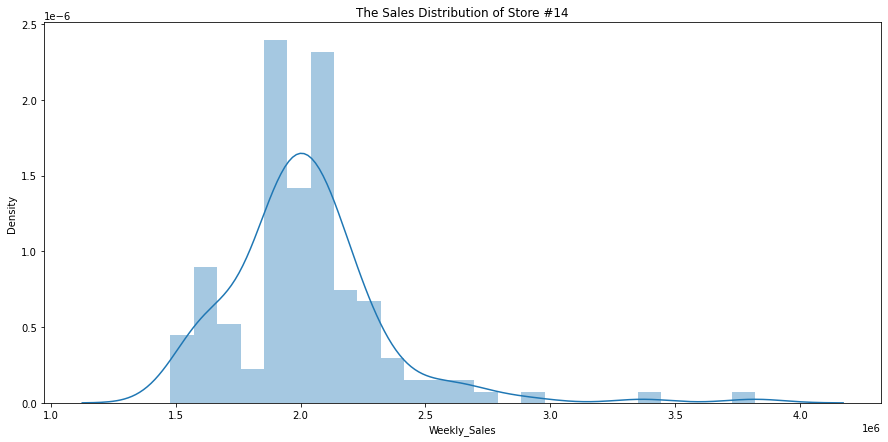

In [ ]:
## visualizing sales distribution for the store having max standard deviation in sales
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == maxStdStore]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(maxStdStore))
plt.show()

3. **Sales Growth**

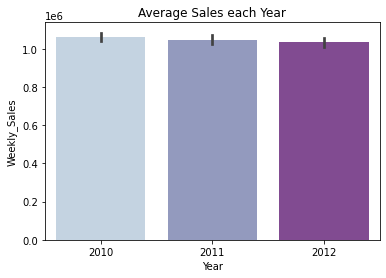

In [ ]:
## Average Sales in each Year
sns.barplot(x='Year', y='Weekly_Sales', data=data,  palette='BuPu')
plt.title('Average Sales each Year')
plt.show()

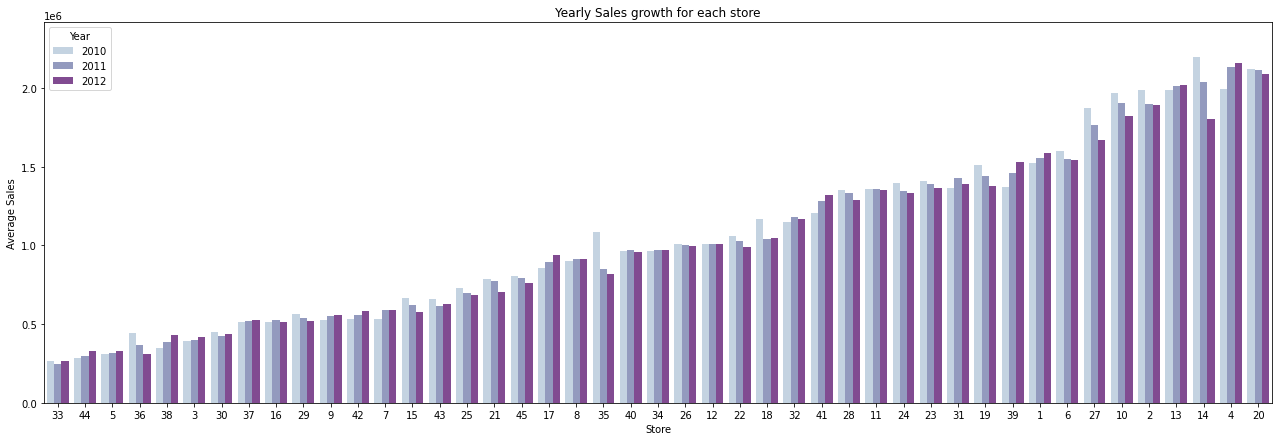

In [ ]:
## Yearly Sales growth for each store
plt.figure(figsize=(22,7))
sns.barplot(x='Store', y='Weekly_Sales', data=data, hue='Year',errwidth=0, order=storeOrder, palette="BuPu", color='cmy')
plt.ylabel('Average Sales')
plt.title('Yearly Sales growth for each store')
plt.show()

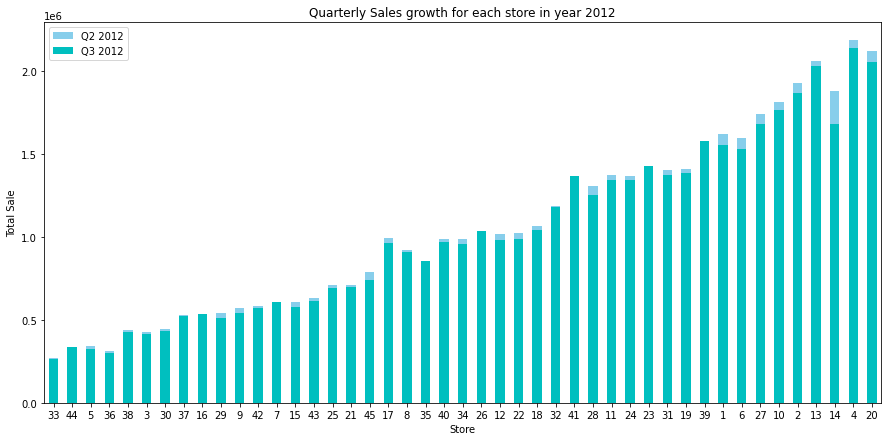

In [ ]:
## Quarterly Sales growth for each store in year 2012
Q3 = data[(data['Date'] > '2012-07-01') & (data['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].mean()
Q2 = data[(data['Date'] > '2012-04-01') & (data['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].mean()

plt.figure(figsize=(15,7))
Q2.loc[storeOrder].plot(kind='bar', color='skyblue', label='Q2 2012')
Q3.loc[storeOrder].plot(kind='bar', color='c', label='Q3 2012')
plt.xticks(rotation=0)
plt.ylabel('Total Sale')
plt.title('Quarterly Sales growth for each store in year 2012')

plt.legend()
plt.show()

*Inference:*
It is evident that Sales growth rate has dropped for all stores significantly.

In [ ]:
## Inference
print('The store which had highest sales drop in last two quater is Store #',Q2.subtract(Q3).idxmax(), 'with drop of $',Q2.subtract(Q3).max())

The store which had highest sales drop in last two quater is Store # 14 with drop of $ 200689.95846153842



4. **Daily Sales**

In [ ]:
## checking intervals in dataset
data.sort_values('Date')['Date'].unique()[:10]

array(['2010-01-10T00:00:00.000000000', '2010-02-04T00:00:00.000000000',
       '2010-02-07T00:00:00.000000000', '2010-02-19T00:00:00.000000000',
       '2010-02-26T00:00:00.000000000', '2010-03-09T00:00:00.000000000',
       '2010-03-12T00:00:00.000000000', '2010-03-19T00:00:00.000000000',
       '2010-03-26T00:00:00.000000000', '2010-04-06T00:00:00.000000000'],
      dtype='datetime64[ns]')

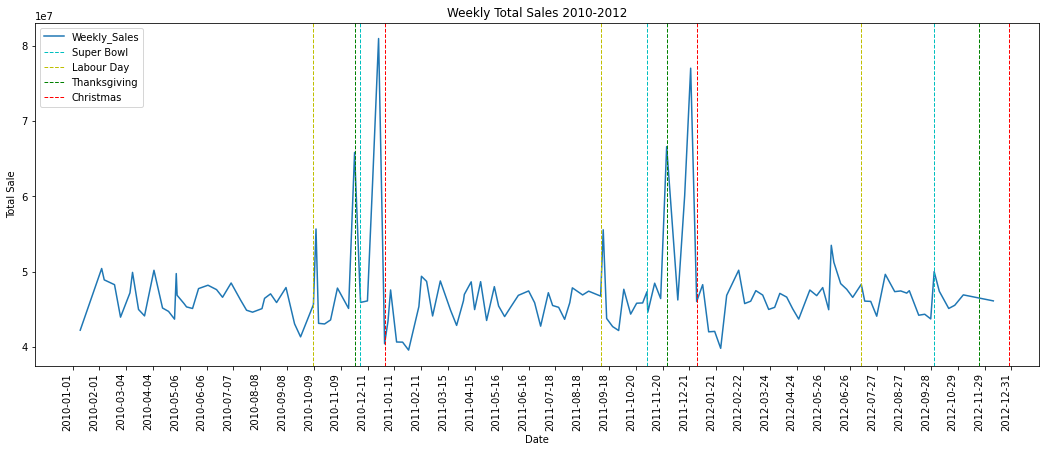

In [ ]:
## Total Sales every week
dailyTotSale = data.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(18,7))
dailyTotSale.plot(kind='line')
plt.xticks(pd.date_range(start="2010-01-01",end="2012-12-31", periods =36), rotation=90)
plt.ylabel('Total Sale')


for i in range(3):
  plt.axvline(Super_Bowl[i], linestyle='--', linewidth=1,  c='c',label='Super Bowl' if i==0 else '')
  plt.axvline(Labour_Day[i], linestyle='--',linewidth=1, c='y',label='Labour Day' if i==0 else '')
  plt.axvline(Thanksgiving[i], linestyle='--',linewidth=1, c='g',label='Thanksgiving' if i==0 else '')
  plt.axvline(Christmas[i], linestyle='--',linewidth=1, c='r',label='Christmas' if i==0 else '')

plt.title('Weekly Total Sales 2010-2012')
plt.legend()
plt.show()

*Inference*   
Holidays have great impact on Sales

In [ ]:
## Average Sales during Holidays
hols=pd.DataFrame(data.groupby('Holiday_Code')['Weekly_Sales'].mean())
hols.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)
hols['Holiday_Name']=['non holiday', 'Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas']
hols

Average_Sales  Holiday_Name
Holiday_Code                             
0              1.041256e+06   non holiday
1              1.079128e+06    Super Bowl
2              1.042427e+06    Labour Day
3              1.471273e+06  Thanksgiving
4              9.608331e+05     Christmas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


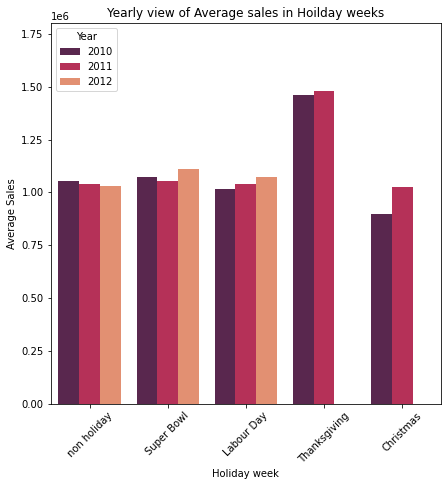

In [ ]:
## Yearly view of Average sales in Hoilday weeks
plt.figure(figsize=(7,7))
sns.barplot('Holiday_Code', 'Weekly_Sales',data=data, hue='Year', errwidth=0, palette="rocket")
plt.ylabel('Average Sales')
plt.xlabel('Holiday week')
plt.xticks([0,1,2,3,4],hols.Holiday_Name, rotation=45)
plt.title('Yearly view of Average sales in Hoilday weeks')
plt.show()

In [ ]:
## Holiday Week having minimum and maximum average sales
print('Minimum average sales  -', hols.loc[hols.Average_Sales.idxmin(),'Holiday_Name'])
print('Maximum average sales  -', hols.loc[hols.Average_Sales.idxmax(),'Holiday_Name'])

Minimum average sales  - Christmas
Maximum average sales  - Thanksgiving


*Inference:*  
`Thanksgiving` week has highest average sales.  
`Christmas` week has lowest average sales.

In [ ]:
## Making weights for the holidays
holRate = pd.DataFrame(hols.Average_Sales.apply(lambda x: int(x/1e6*1000))).reset_index()
holRate.rename(columns={'Average_Sales':'Holiday_rate'}, inplace=True)
data = data.merge(holRate)


5. **Monthly Sales**

In [ ]:
## Monthly View of Average Sales
df=pd.DataFrame(data.groupby(['Month','Year'])['Weekly_Sales'].mean())
df.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)
df

Average_Sales
Month Year               
1     2010   9.386639e+05
      2011   9.420697e+05
      2012   9.567817e+05
2     2010   1.064372e+06
      2011   1.042273e+06
      2012   1.057997e+06
3     2010   1.034590e+06
      2011   1.011263e+06
      2012   1.025510e+06
4     2010   1.021177e+06
      2011   1.033220e+06
      2012   1.014127e+06
5     2010   1.039303e+06
      2011   1.015565e+06
      2012   1.053948e+06
6     2010   1.055082e+06
      2011   1.038471e+06
      2012   1.082920e+06
7     2010   1.023702e+06
      2011   9.976049e+05
      2012   1.025480e+06
8     2010   1.025212e+06
      2011   1.044895e+06
      2012   1.064514e+06
9     2010   9.983559e+05
      2011   1.026810e+06
      2012   9.988663e+05
10    2010   1.027201e+06
      2011   1.020663e+06
      2012   1.044885e+06
11    2010   1.176097e+06
      2011   1.126535e+06
      2012   1.042797e+06
12    2010   1.198413e+06
      2011   1.274311e+06
      2012   1.025078e+06

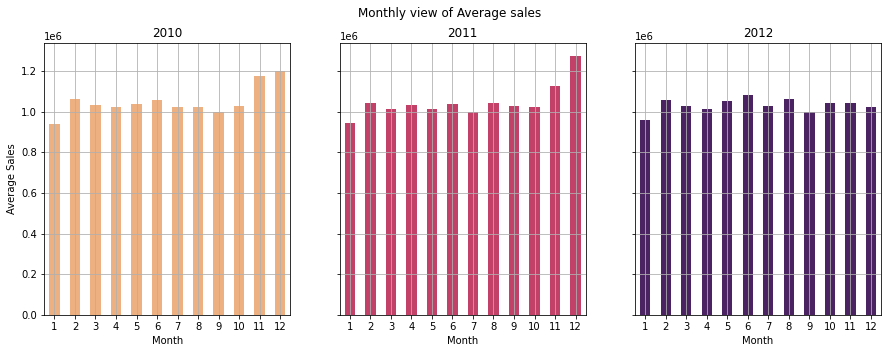

In [ ]:
## Monthly view average sales each Year
ax=df.unstack(level=1).plot(kind='bar', subplots=True, figsize=(15,5), layout=(1,3), rot=0, sharey=True, grid=True, ylabel='Average Sales', legend=False, title=['2010', '2011','2012'], colormap='flare')
plt.suptitle('Monthly view of Average sales')
plt.show()


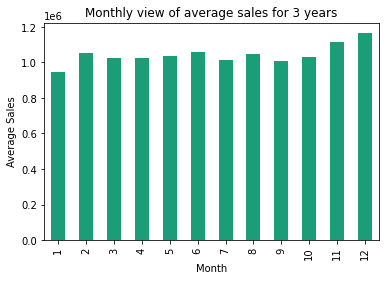

In [ ]:
df.groupby('Month')['Average_Sales'].mean().plot(kind='bar', title='Monthly view of average sales for 3 years', ylabel='Average Sales', colormap='Dark2')

*Inference:*  
Month of December experiences highest average sales, possibly due to pre-christmas shopping.

6. **Temperature Impacts**

In [ ]:
## Temperature Stats
data.Temperature.describe()

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Temperature Graph')

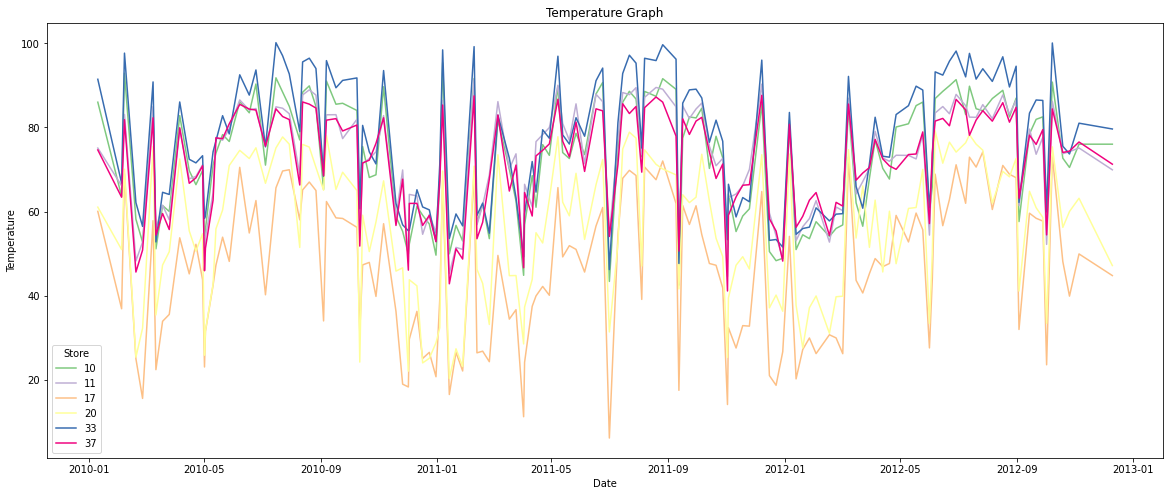

In [ ]:
## Temperature Graph for some of the stores
dtemp=data[data.Store.isin([33,37,17,11,10,20])][['Date','Temperature', 'Store']]
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'Temperature', data=dtemp, hue='Store', palette='Accent')
plt.title('Temperature Graph')

*Inference*:   
Temperature in our dataset has been measured in Farenheit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


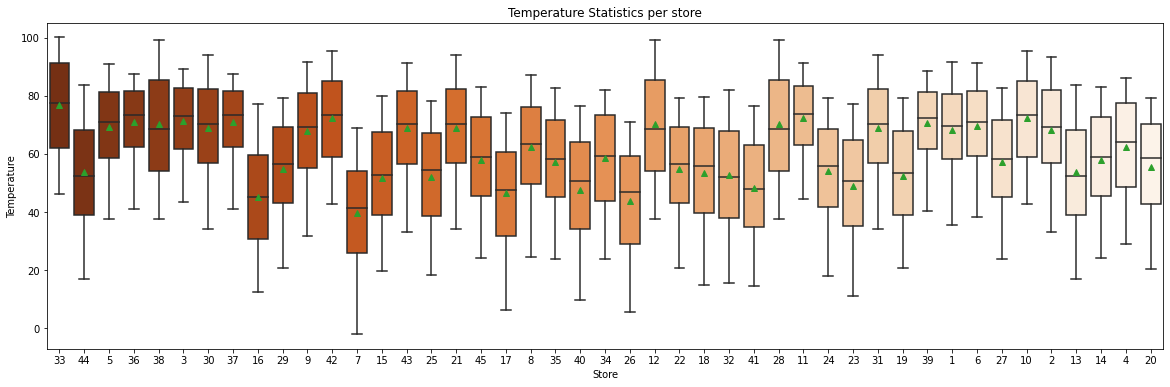

In [ ]:
## Temperature Statistics per store
plt.figure(figsize=(20,6))
sns.boxplot('Store', 'Temperature',  data=data, order=storeOrder, showmeans=True,palette='Oranges_r')
plt.title('Temperature Statistics per store')
plt.show()

*Inference*:  
Temperature Varies Similarly for each stores. Therefore, we can infer that the stores are situated not at a far distance, possibly they belongs to different states of a country.

In [ ]:
## min max scaling of Temperature
scaler = data.groupby('Store')['Temperature'].describe()[['min','max']]
data['Scaled_Temperature']=0
for ind in data.index:
  st=data.loc[ind,'Store']
  tem=data.loc[ind,'Temperature']
  min, max=scaler.loc[st,:]
  data.loc[ind,'Scaled_Temperature'] = (tem-min)/(max-min)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


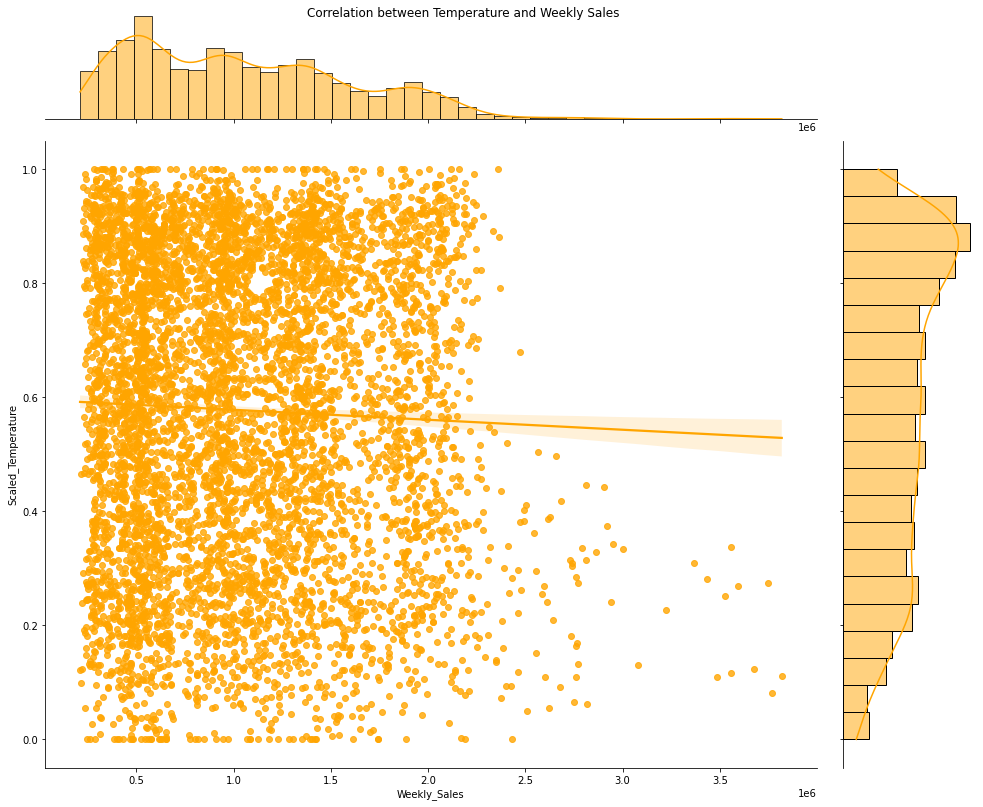

In [ ]:
## Correlation between Temperature and Weekly Sales
a = sns.jointplot( 'Weekly_Sales','Scaled_Temperature', data=data, color='orange', kind='reg')
a.figure.set_figwidth(15)
a.figure.set_figheight(12)
a.fig.suptitle("Correlation between Temperature and Weekly Sales")
plt.show()

*Inference*:    
Sales are more at moderate to high temperature

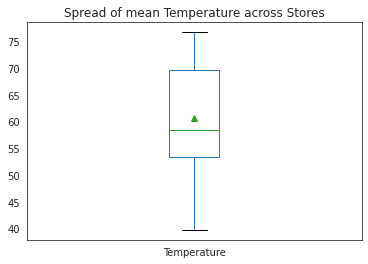

In [ ]:
## Spread of mean Temperature across Stores 
data.groupby('Store')['Temperature'].mean().plot(kind='box', showmeans=True)
plt.title('Spread of mean Temperature across Stores')
plt.show()

*Inference*:      
For the Given Dataset Average ranges form 40F to 77F approximately

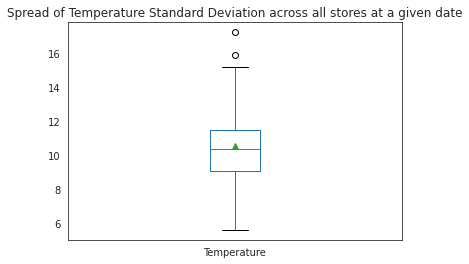

In [ ]:
## Spread of Temperature Standard Deviation across all stores at a given date
data.groupby('Date')['Temperature'].std().plot(kind='box', showmeans=True)
plt.title('Spread of Temperature Standard Deviation across all stores at a given date')
plt.show()


*Inference*:     
On given Date, the average temperature differences in the country varies from 8F-12F.

7. **Fuel Prices impacts**

In [ ]:
## Fuel Stats 
data.Fuel_Price.describe()

count    6435.000000
mean        3.358607
std         0.459020
min         2.472000
25%         2.933000
50%         3.445000
75%         3.735000
max         4.468000
Name: Fuel_Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


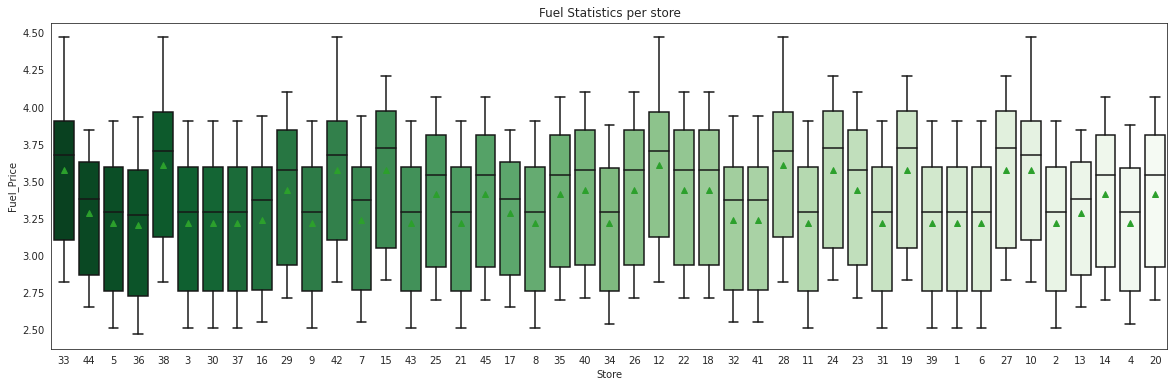

In [ ]:
## Fuel Statistics per Store
plt.figure(figsize=(20,6))
sns.boxplot('Store', 'Fuel_Price',  data=data, order=storeOrder, showmeans=True,palette='Greens_r')
plt.title('Fuel Statistics per store')
plt.show()

*Inference*:     
All Stores has similar fuel prices.

In [ ]:
## Average Fuel Prices and Average Fuel Prices in 3 Years
dfuel=data.groupby('Year')[['Fuel_Price','Weekly_Sales']].mean()
dfuel.rename(columns={'Fuel_Price':'Average Fuel Price', 'Weekly_Sales':'Average Weekly_Sales'})

Average Fuel Price  Average Weekly_Sales
Year                                          
2010            2.823767          1.059670e+06
2011            3.561915          1.046239e+06
2012            3.709776          1.033660e+06

*Inference*:    
Average Fuel Prices as well as Average Sales has increased.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


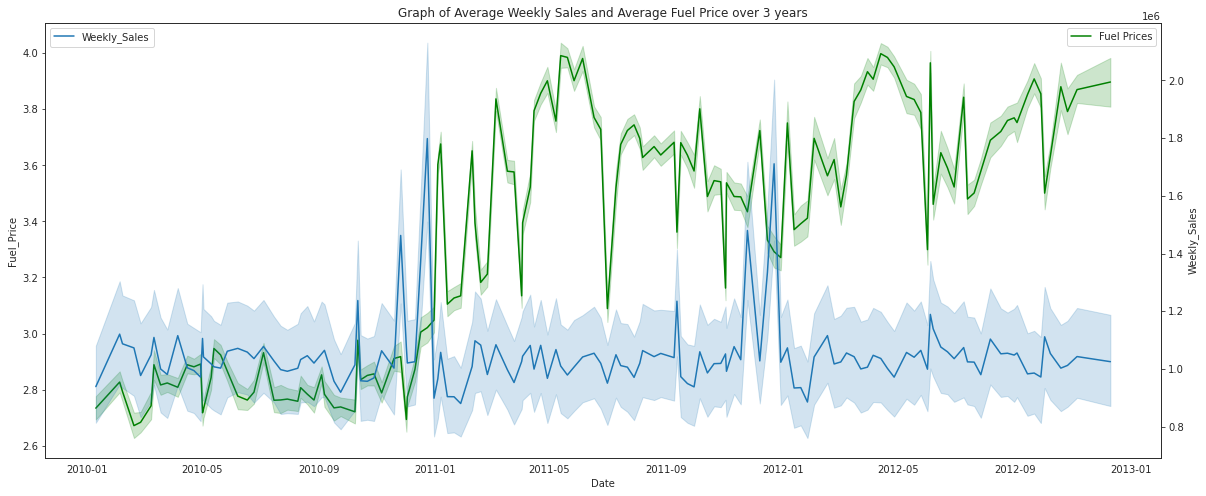

In [ ]:
## Graph of Average Weekly Sales and Average Fuel Price over 3 years 
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'Fuel_Price', data=data,  color='g',label='Fuel Prices')
ax2 = plt.twinx()
sns.lineplot('Date', 'Weekly_Sales', data=data, ax=ax2, label='Weekly_Sales')
plt.title('Graph of Average Weekly Sales and Average Fuel Price over 3 years')
ax2.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


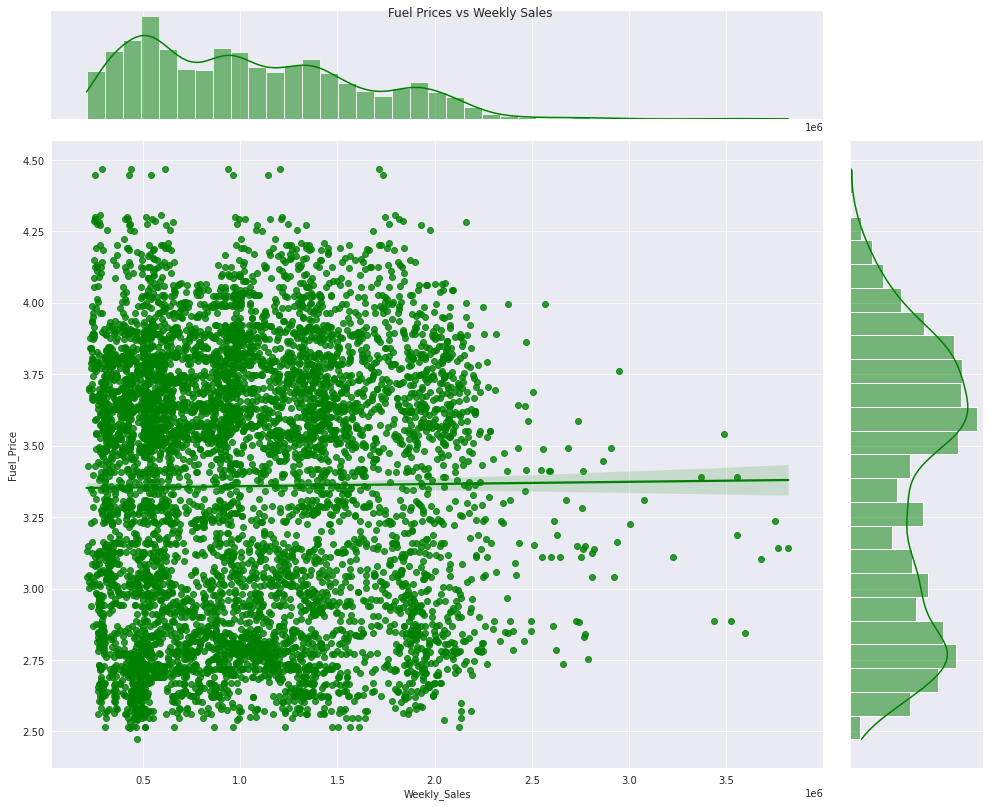

In [ ]:
## Fuel Prices vs Weekly Sales
a=sns.jointplot( 'Weekly_Sales','Fuel_Price', data=data, color='green', kind='reg')
a.figure.set_figwidth(15)
a.figure.set_figheight(12)
a.fig.suptitle("Fuel Prices vs Weekly Sales")
plt.show()

*Inference*:    
Fuel Prices and Weekly Sales are hardly correlated

In [ ]:
sns.set_style("white")

8. **Consmer Price Index Impacts**

In [ ]:
## Consumer Price Stats
data.CPI.describe()

count    6435.000000
mean      171.578394
std        39.356712
min       126.064000
25%       131.735000
50%       182.616521
75%       212.743293
max       227.232807
Name: CPI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


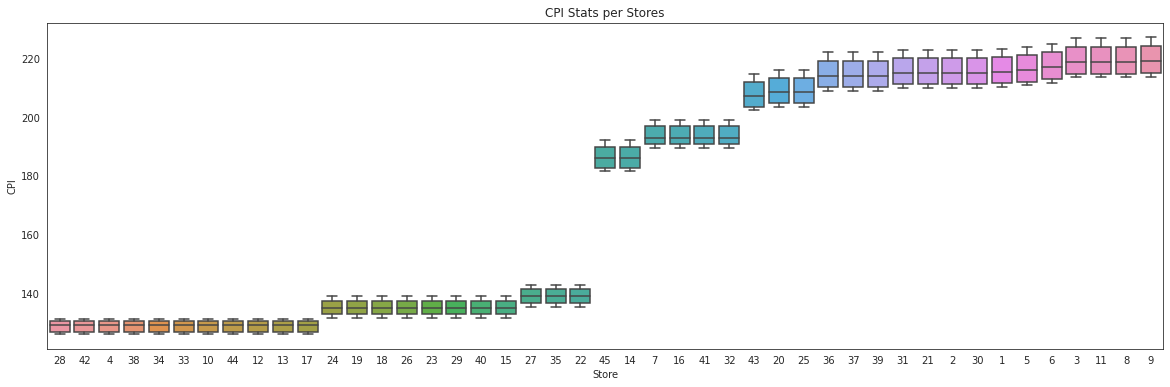

In [ ]:
## CPI Stats per Stores
cpiOrder = data.groupby('Store')['CPI'].mean().sort_values().index
plt.figure(figsize=(20,6))
sns.boxplot('Store', 'CPI',  data=data, order=cpiOrder)
plt.title('CPI Stats per Stores')
plt.show()

In [ ]:
## Extracting Representative stores for Each CPI level
meanCpistores = pd.DataFrame(data.groupby('Store')['CPI'].mean().sort_values())
meanCpistores['CPI'] = meanCpistores.CPI.apply(lambda x: int(x))
storedivs = pd.DataFrame(meanCpistores.reset_index().groupby('CPI')['Store'].min())
storedivs.index.names=['CPI_level']
storedivs

Store
CPI_level       
128            4
135           15
139           22
186           14
193            7
207           43
209           20
214           36
215            1
216            5
217            6
219            3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

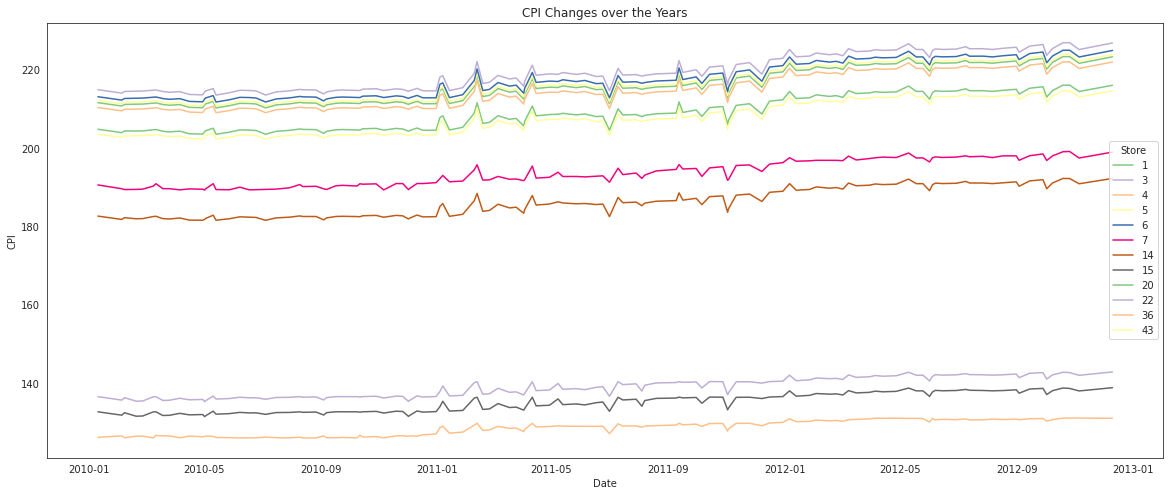

In [ ]:
## CPI Changes over the Years
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'CPI', data=data[data.Store.isin(storedivs.Store)], hue='Store', palette='Accent')
plt.title('CPI Changes over the Years')
plt.plot()

*Inference*:    
The Changes in CPIs are similar and thereore the stores are located in same country, where they gets affected uniformly by economic changes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


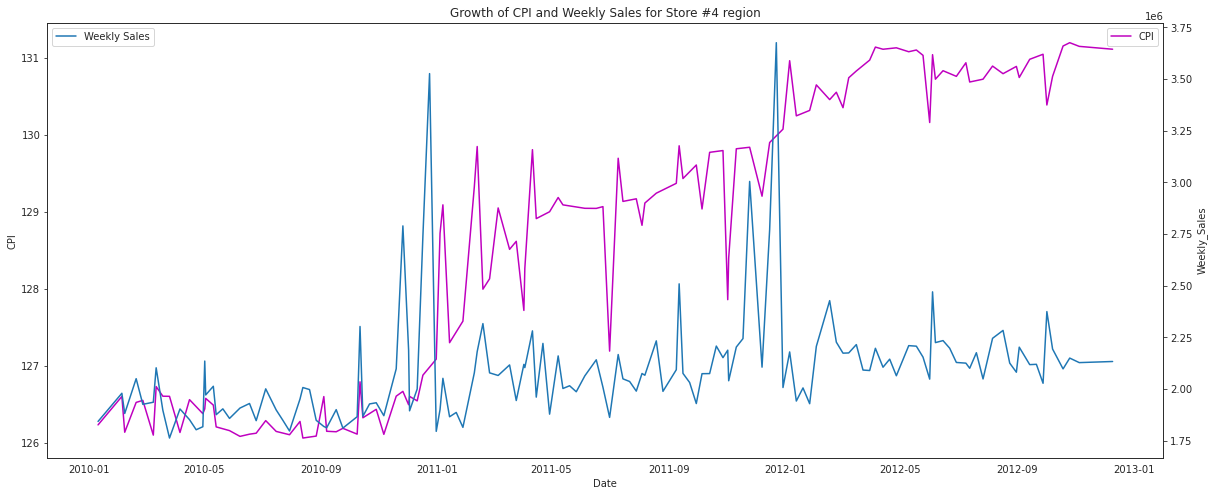

In [ ]:
## Growth of CPI and Weekly Sales for Store #4 region
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'CPI', data=data[data.Store==4], color='m', label='CPI')
ax2 = plt.twinx()
sns.lineplot('Date', 'Weekly_Sales', data=data[data.Store==4], ax=ax2, label='Weekly Sales')
plt.title('Growth of CPI and Weekly Sales for Store #4 region')
ax2.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


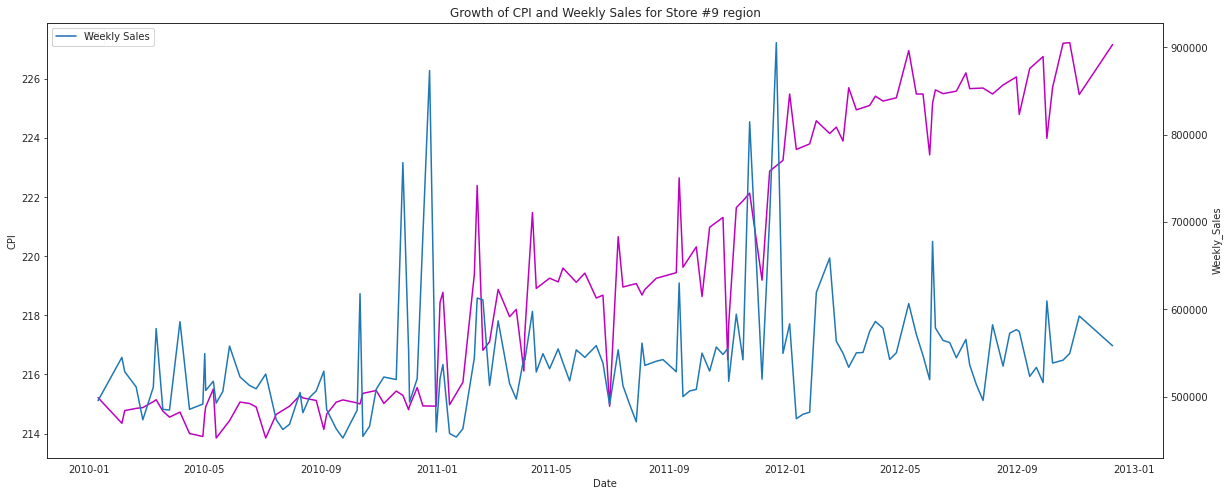

In [ ]:
## Growth of CPI and Weekly Sales for Store #9 region
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'CPI', data=data[data.Store==9], color='m', label='CPI')
ax2 = plt.twinx()
sns.lineplot('Date', 'Weekly_Sales', data=data[data.Store==9], ax=ax2, label='Weekly Sales')
plt.title('Growth of CPI and Weekly Sales for Store #9 region')
ax2.legend(loc="upper left")
plt.show()

*Inference*:  
Possibly Average sales has increases with increase in CPI. 

In [ ]:
## inflation report
CpiYearly = pd.DataFrame(data.groupby(['Store', 'Year'])['CPI'].mean())
CpiYearly = CpiYearly.unstack(level=1)
CpiYearly.columns = ["meanCpi_"+str(a[1]) for a in CpiYearly.columns.to_flat_index()]
CpiYearly = CpiYearly.assign(inflation2011 = lambda x: (x['meanCpi_2011'] - x['meanCpi_2010'])/x['meanCpi_2010'])
CpiYearly = CpiYearly.assign(inflation2012 = lambda x: (x['meanCpi_2012'] - x['meanCpi_2011'])/x['meanCpi_2011'])
CpiYearly[['inflation2011','inflation2012']].style.format({'inflation2011': "{:.3%}", 'inflation2012': "{:.3%}"})

In [ ]:
## Inference
print(f"Mean inflation = {(CpiYearly['inflation2011'].mean()+CpiYearly['inflation2011'].mean())/2:.3%}")

Mean inflation = 2.056%


*Inference*:     
Average Inflation has been 2.056% every year.

In [ ]:
## min max scaling of CPI
scaler = data.groupby('Store')['CPI'].describe()[['min','max']]
data['Scaled_CPI']=0
for ind in data.index:
  st=data.loc[ind,'Store']
  cpi=data.loc[ind,'CPI']
  min, max=scaler.loc[st,:]
  data.loc[ind,'Scaled_CPI'] = (cpi-min)/(max-min)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


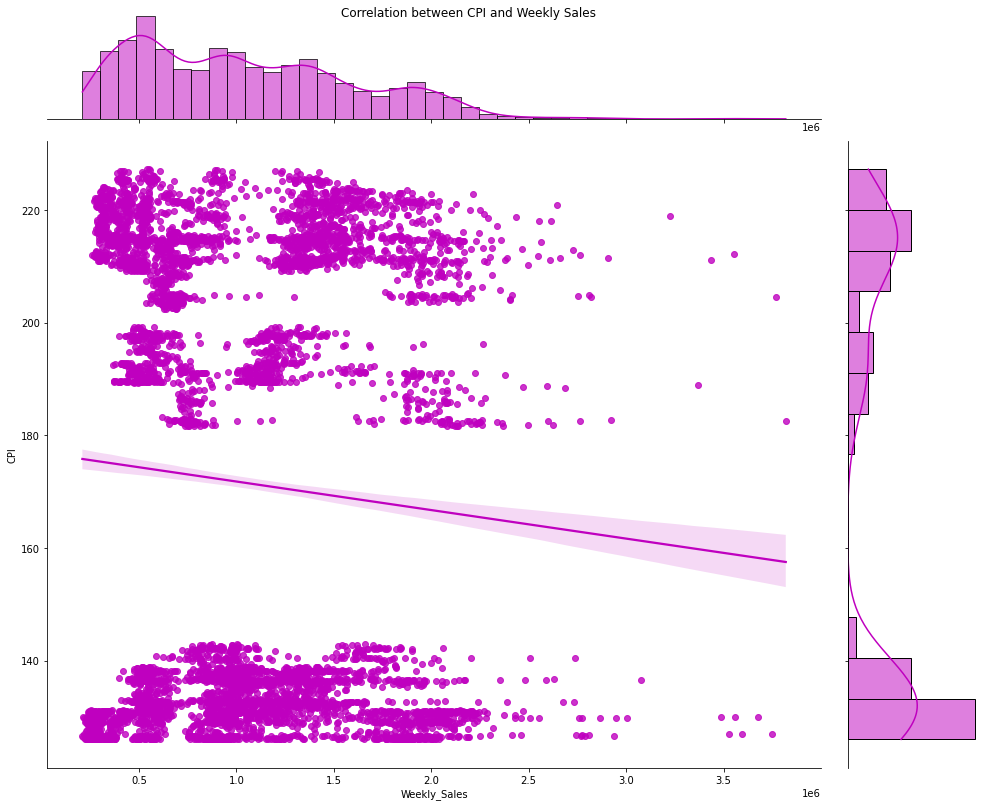

In [ ]:
## Correlation between Temperature and Weekly Sales
a = sns.jointplot( 'Weekly_Sales','CPI', data=data, color='m', kind='reg')
a.figure.set_figwidth(15)
a.figure.set_figheight(12)
a.fig.suptitle("Correlation between CPI and Weekly Sales")
plt.show()

*Inference*:    
There is good correlation between CPI and Weekly Sales. Higher Weekly Sales density is observed for high CPI.

9. **Unemployment Rate Impacts**

In [ ]:
## Unemployment Rate Stats
data.Unemployment.describe()

count    6435.000000
mean        7.999151
std         1.875885
min         3.879000
25%         6.891000
50%         7.874000
75%         8.622000
max        14.313000
Name: Unemployment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

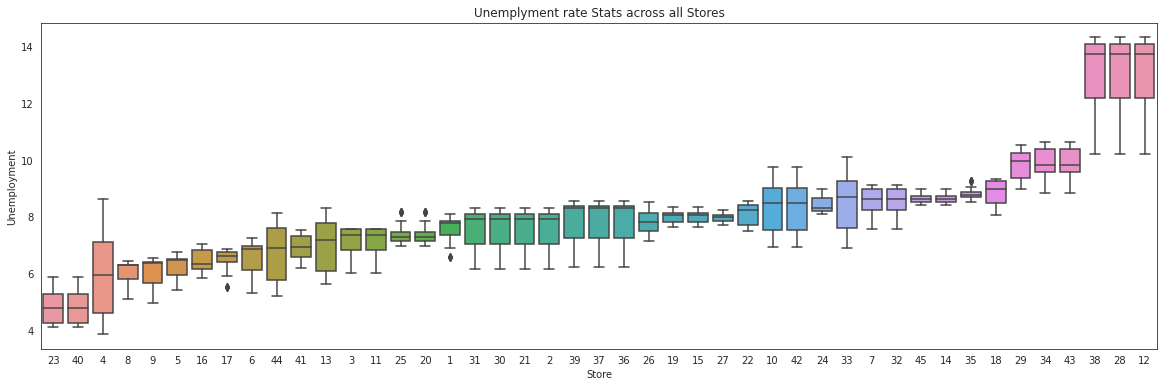

In [ ]:
## Unemplyment Rate Stats across Stores
uemplOrder = data.groupby('Store')['Unemployment'].mean().sort_values().index
plt.figure(figsize=(20,6))
sns.boxplot('Store', 'Unemployment',  data=data, order=uemplOrder)
plt.title('Unemplyment rate Stats across all Stores')
plt.plot()

*Inference*:     
Unemployment Rate Varies largely amomg the stores.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

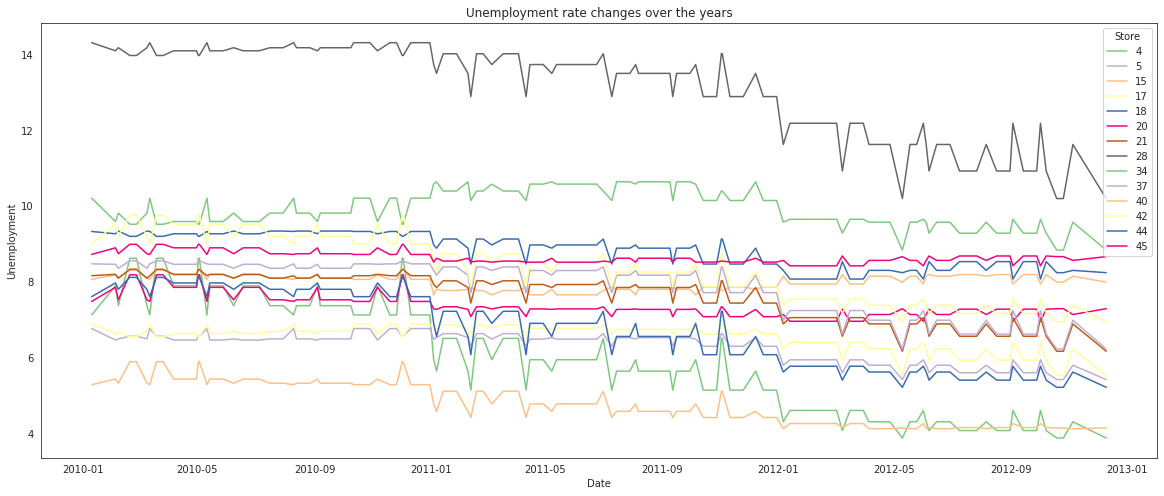

In [ ]:
## Unemployment rate graph for some of the stores
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'Unemployment', data=data[data.Store.isin([40,4,5,17,44,20,21,37,15,42,45,18,34,28])], hue='Store', palette='Accent')
plt.title('Unemployment rate changes over the years')
plt.plot()

*Inference*:      
Unemployemnt Rate has decreased over the years, for all stores. Some of the stores have similar Unemployent rate changes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


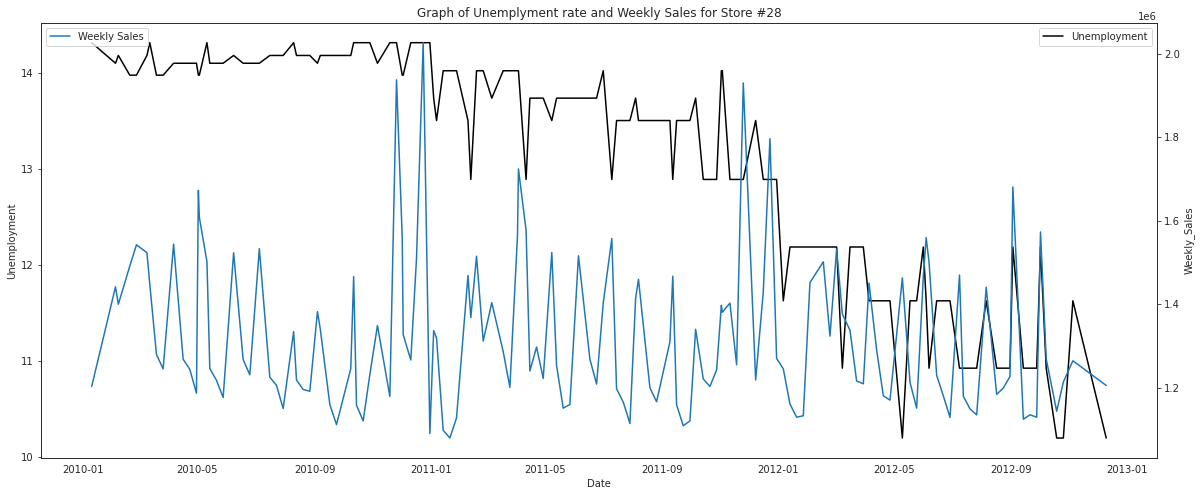

In [ ]:
## Graph of Unemplyment rate and Weekly Sales for Store #28
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'Unemployment', data=data[data.Store==28], color='black', label='Unemployment')
ax2 = plt.twinx()
sns.lineplot('Date', 'Weekly_Sales', data=data[data.Store==28], ax=ax2, label='Weekly Sales')
plt.title('Graph of Unemplyment rate and Weekly Sales for Store #28')
ax2.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


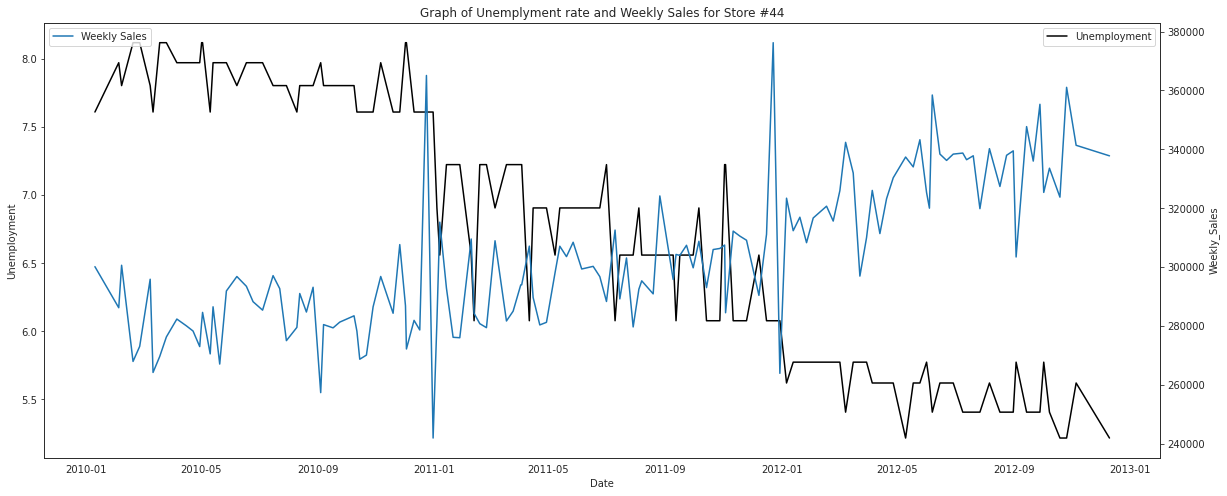

In [ ]:
## Graph of Unemplyment rate and Weekly Sales for Store #44
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'Unemployment', data=data[data.Store==44], color='black', label='Unemployment')
ax2 = plt.twinx()
sns.lineplot('Date', 'Weekly_Sales', data=data[data.Store==44], ax=ax2, label='Weekly Sales')
plt.title('Graph of Unemplyment rate and Weekly Sales for Store #44')
ax2.legend(loc="upper left")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


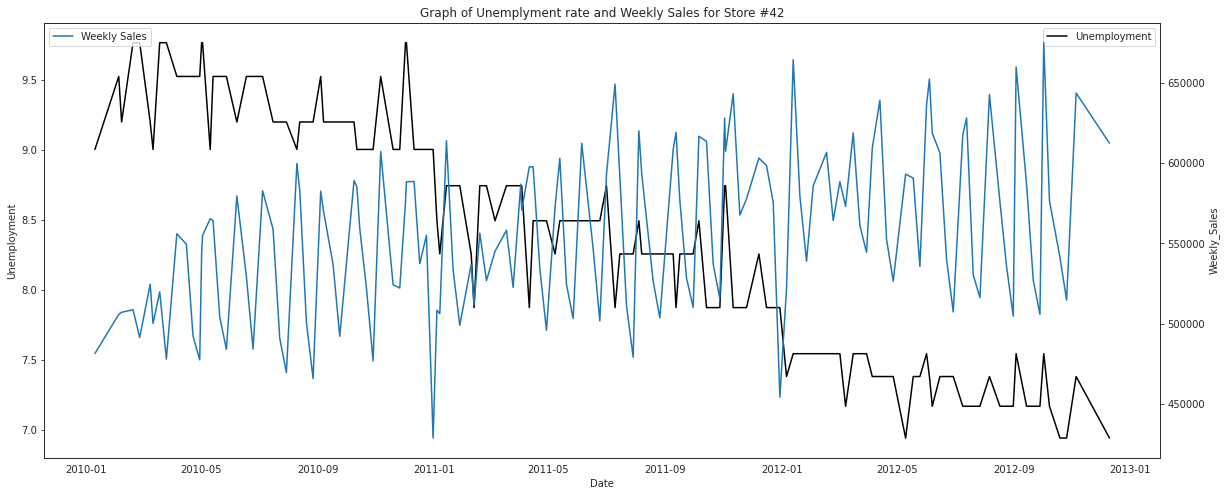

In [ ]:
## Graph of Unemplyment rate and Weekly Sales for Store #42
plt.figure(figsize=(20,8))
sns.lineplot('Date', 'Unemployment', data=data[data.Store==42], color='black', label='Unemployment')
ax2 = plt.twinx()
sns.lineplot('Date', 'Weekly_Sales', data=data[data.Store==42], ax=ax2, label='Weekly Sales')
plt.title('Graph of Unemplyment rate and Weekly Sales for Store #42')
ax2.legend(loc="upper left")
plt.show()

In [ ]:
## min max scaling of Unemployment
scaler = data.groupby('Store')['Unemployment'].describe()[['min','max']]
data['Scaled_Unemployment']=0
for ind in data.index:
  st=data.loc[ind,'Store']
  tem=data.loc[ind,'Unemployment']
  min, max=scaler.loc[st,:]
  data.loc[ind,'Scaled_Unemployment'] = (tem-min)/(max-min)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


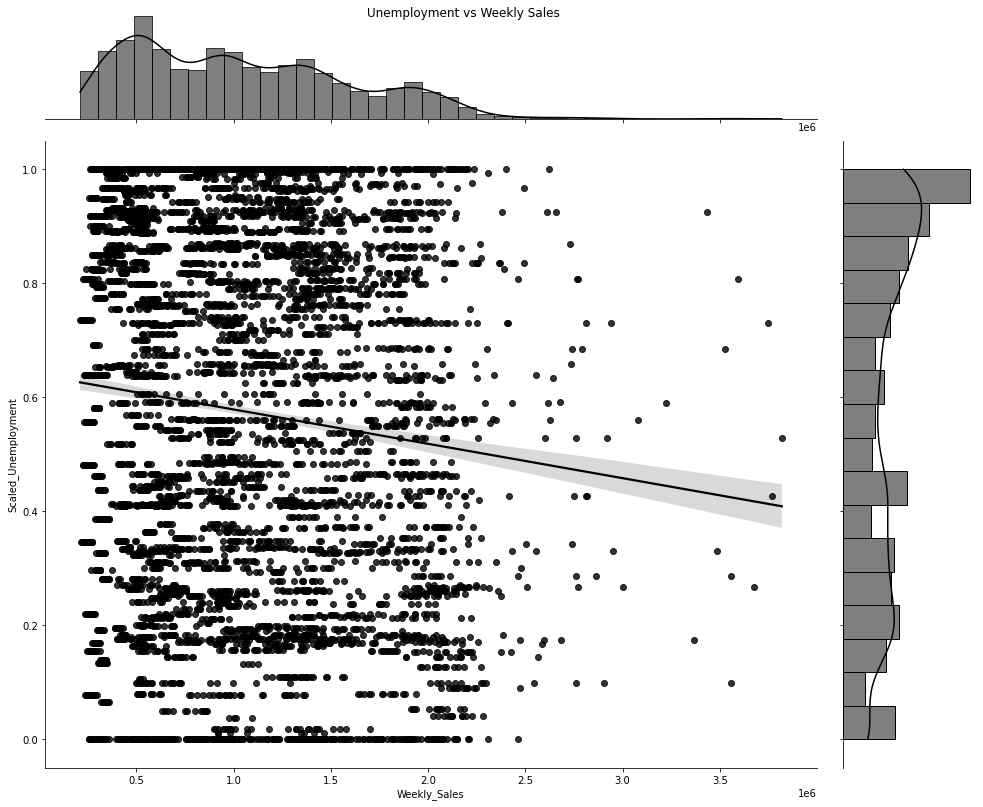

In [ ]:
## Unemployment Rate vs Weekly Sales
a=sns.jointplot( 'Weekly_Sales','Scaled_Unemployment', data=data, color='black', kind='reg')
a.figure.set_figwidth(15)
a.figure.set_figheight(12)
a.fig.suptitle("Unemployment vs Weekly Sales")
plt.show()

*Inference*:     
It is Observed that lower unemployment rate has high weekly sales.

10. **Correlations**

[]

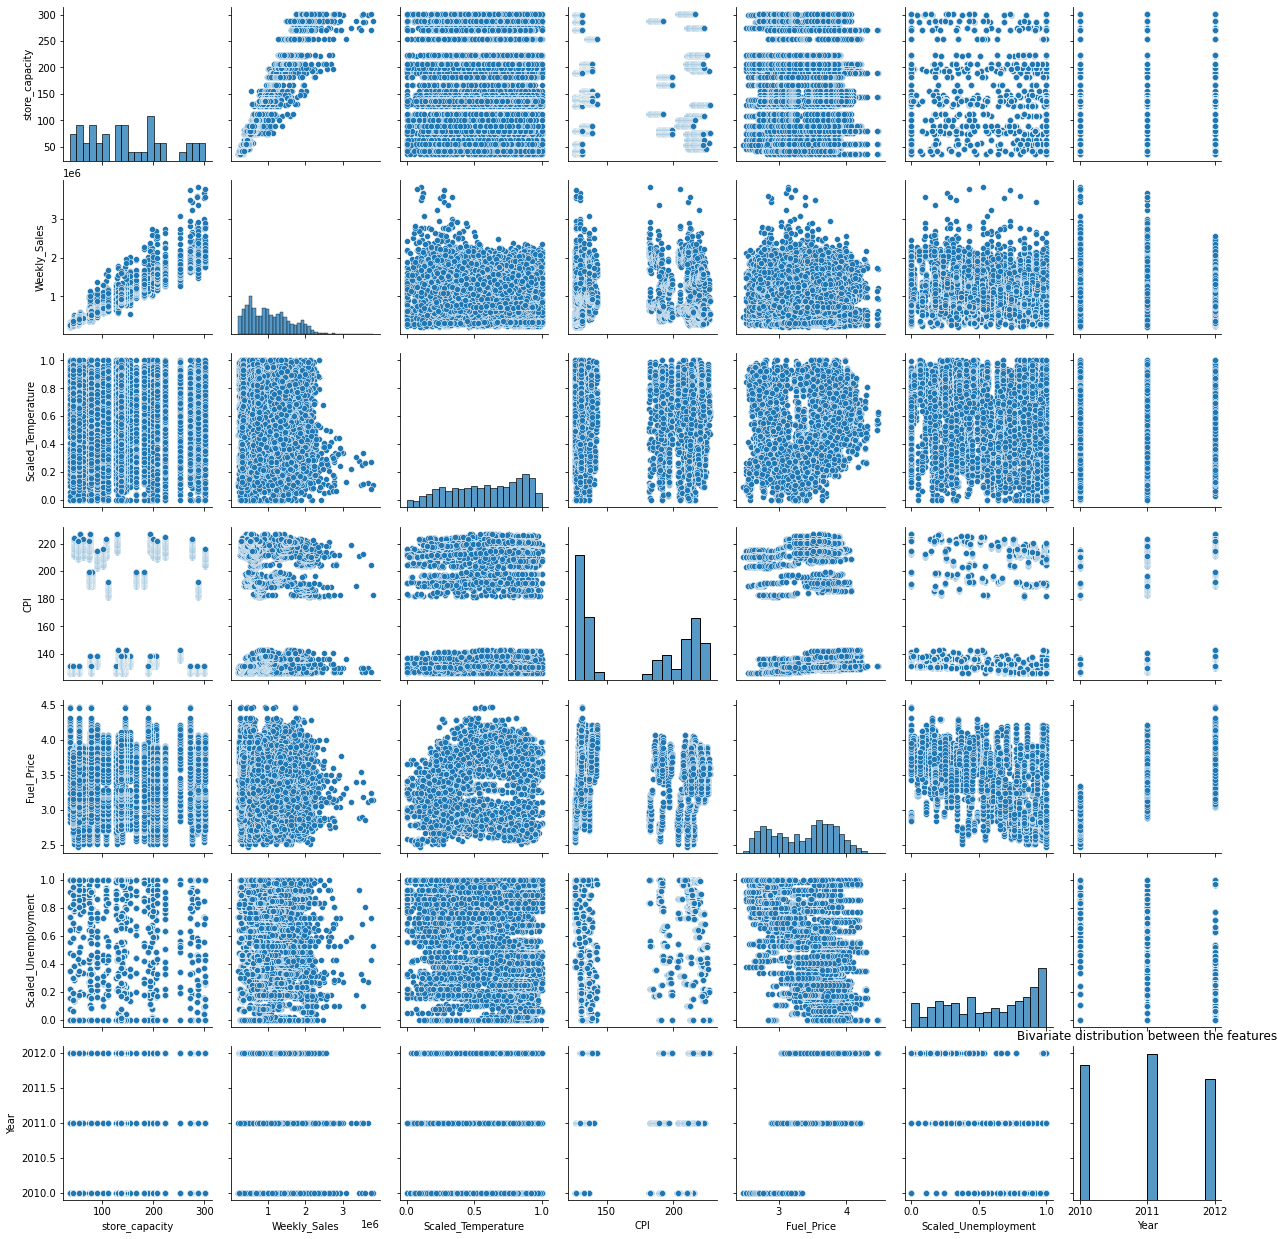

In [ ]:
## Bivariate distribution between the features
sns.pairplot(data[['store_capacity','Weekly_Sales', 'Scaled_Temperature', 'CPI', 'Fuel_Price', 'Scaled_Unemployment', 'Year']])
plt.title('Bivariate distribution between the features')
plt.plot()

In [ ]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Holiday_Code', 'Scaled_Temperature', 'Scaled_Unemployment',
       'store_capacity'],
      dtype='object')

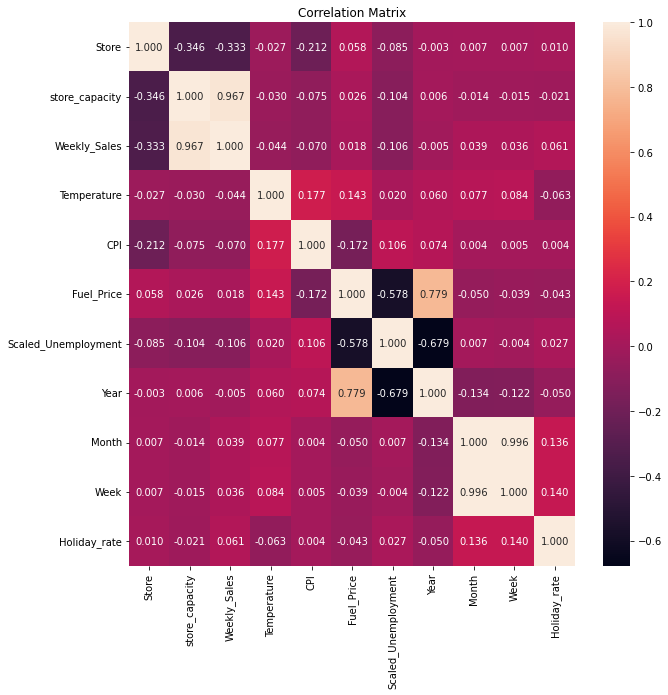

In [ ]:
##Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df[['Store','store_capacity','Weekly_Sales', 'Temperature', 'CPI', 'Fuel_Price', 'Scaled_Unemployment', 'Year','Month','Week','Holiday_rate']].corr(), annot=True, fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

#### **Building Prediction Model for predicting Weekly_Sales**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

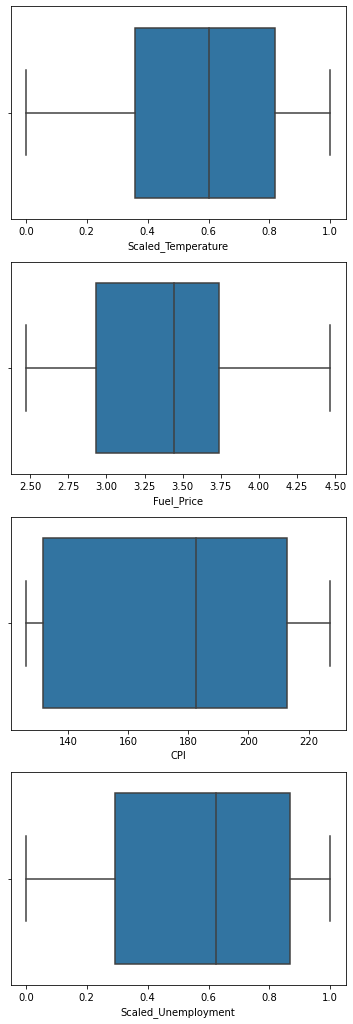

In [ ]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Scaled_Temperature','Fuel_Price','CPI','Scaled_Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly_Sales outlier detection')

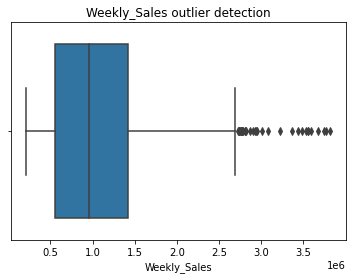

In [ ]:
## find outliers for target variable
sns.boxplot(data['Weekly_Sales'])
plt.title('Weekly_Sales outlier detection')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly_Sales outlier removed')

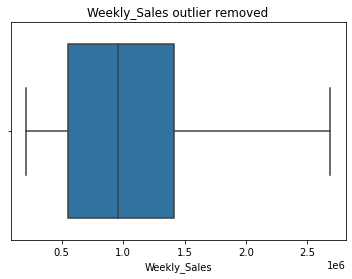

In [ ]:
## removing outliers
Q1 = data['Weekly_Sales'].quantile(0.25)
Q3 = data['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

df = data[~((data['Weekly_Sales'] < (Q1 - 1.5 * IQR)) |(data['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
sns.boxplot(df['Weekly_Sales'])

plt.title('Weekly_Sales outlier removed')

In [ ]:
## Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
## Splitting 
X = df[['store_capacity','Week','CPI','Temperature','Scaled_Unemployment','Month','Holiday_rate']]
y = df['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

In [ ]:
## Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy on training data:',reg.score(X_train, y_train)*100)
print('Accuracy on testing data:',reg.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Linear Regression:

Accuracy on training data: 94.63197548070322
Accuracy on testing data: 94.17138830852382
Mean Absolute Error: 82882.47875057062
Mean Squared Error: 17291474431.990482
Root Mean Squared Error: 131497.0510391411


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Linear Regression model')

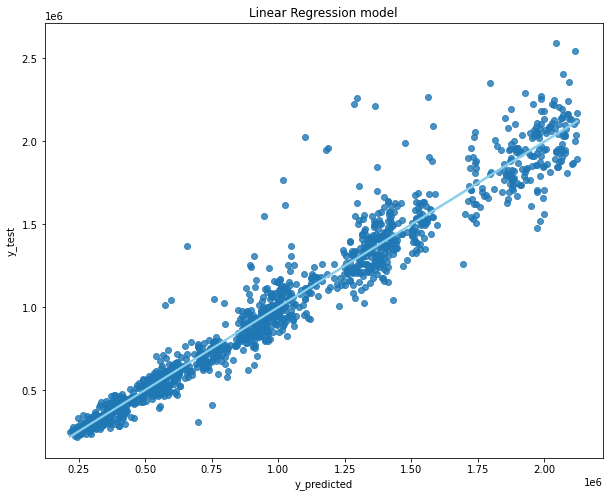

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(y_pred, y_test, line_kws={"color": "skyblue"})
plt.xlabel('y_predicted')
plt.ylabel('y_test')
plt.title('Linear Regression model')

In [ ]:
coeff_parameter = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
store_capacity        6879.048979
Week                -13149.931678
CPI                     64.421342
Temperature           -290.479971
Scaled_Unemployment -19650.183821
Month                64084.061248
Holiday_rate           863.005259

In [ ]:
## Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy on training data:',rfr.score(X_train, y_train)*100)
print('Accuracy on testing data:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




Random Forest Regressor:

Accuracy on training data: 98.71834119747416
Accuracy on testing data: 97.52021618550609
Mean Absolute Error: 56625.49061530789
Mean Squared Error: 7356660675.799024
Root Mean Squared Error: 85770.97805084784


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Random Forest Regression model')

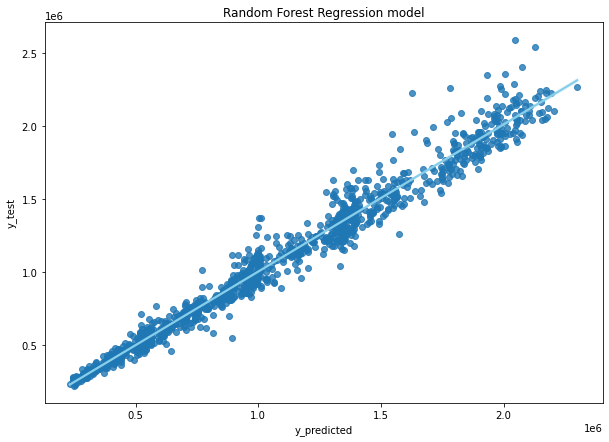

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(y_pred, y_test, line_kws={"color": "skyblue"});
plt.xlabel('y_predicted')
plt.ylabel('y_test')

plt.title('Random Forest Regression model')